# Playing the whole game

## 1. Look at the big picture

### 1.1 Frame the problem

**The task/problem**<br>
Box office blabla

**The goal**<br>
To get good predictions blbllblb

**Solution to the problem**<br>
nvfewdc

### 1.2 Select performance measure

It is important to have a way of measuring the performance of the model. There are many different ways of measuring performance, but for this problem we chose the Root Mean Square Error(RMSE). This method measures the standard deviaton of the errors and is widly used as a performance metric with regression problems.

$ RMSE (X, h) = \sqrt{(\frac{1}{m})\sum_{i=1}^{m}(h(x^{i}) - y^{i})^{2}} $

- m: number of instances in the dataset you are measuring the RMSE on. <br>
- $ x^{i} $ : vector of all the feature values (excluding the label) of the ith instance in
the dataset, and $ y^{i} $) is its label (the desired output value for that instance).<br>
- X: matrix containing all the feature values (excluding labels) of all instances in
the dataset.<br>
- h: the system’s prediction function, also called a hypothesis.<br>
- RMSE(X,h) is the cost function measured on the set of examples using your
hypothesis h.

## 2 Get the data

### 2.1 Setup

In [3]:
#To display plots directly in the notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn

# To make the notebook reproducible
seed = 42
np.random.seed(seed)

### 2.2 Importing the data

Here we list the files found in the data folder.

In [4]:
import os
print(os.listdir("data"))

['sample_submission.csv', 'test.csv', 'train.csv']


The train.csv file is the one we will use to train, validate and test our model. <br><br>
By using Pandas we create DataFrames containing the datasets.

In [6]:
films = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

### 2.2 Taking a look at the data

To get a quick overview of the data we can use the head() function. 

In [10]:
films.head(10)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   
5   6                                                NaN   8000000   
6   7                                                NaN  14000000   
7   8                                                NaN         0   
8   9  [{'id': 256377, 'name': 'The Muppet Collection...         0   
9  10                                                NaN   6000000   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
5  [{'id': 16, 'name': 'Animation'}, {'id': 12, '...   
6  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
7                [{'id': 99, 'name': 'Documentary'}]   
8  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
9  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   

                             homepage    imdb_id original_language  \
0                                 NaN  tt2637294                en   
1                                 NaN  tt0368933                en   
2   http://sonyclassics.com/whiplash/  tt2582802                en   
3          http://kahaanithefilm.com/  tt1821480                hi   
4                                 NaN  tt1380152                ko   
5                                 NaN  tt0093743                en   
6  http://www.thepossessionmovie.com/  tt0431021                en   
7                                 NaN  tt0391024                en   
8                                 NaN  tt0117110                en   
9                                 NaN  tt0310281                en   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   
5    Pinocchio and the Emperor of the Night   
6                            The Possession   
7                              Control Room   
8                    Muppet Treasure Island   
9                             A Mighty Wind   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   
5  Pinocchio and his friends, a glow worm and a m...    0.743274  ...   
6  A young girl buys an antique box at a yard sal...    7.286477  ...   
7  A chronicle which provides a rare window into ...    1.949044  ...   
8  After telling the story of Flint's last journe...    6.902423  ...   
9  In "A Mighty Wind", director Christopher Guest...    4.672036  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   
5       8/6/87    83.0           [{'iso_639_1': 'en', 'name'

Here we see that some of the columns contains dictionaries. This will have to be explored further.<br><br>
To get more info on the dataset we use the info() method

In [11]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

From this we see that there are 23 attributes of various type. Most of them are objects, but there are some ints and floats. We can also see that there are 3000 entries, which is a bit few for ML standards, and some of the attributes have fewer non null values. <br><br>
From the table below we can see the count, mean, standard deviation as well as the minimun, 25%, 50%, 75% and max entry. (This is only done with the numerical attributes).<br>
The id column is not important here.

In [12]:
films.describe()

id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09

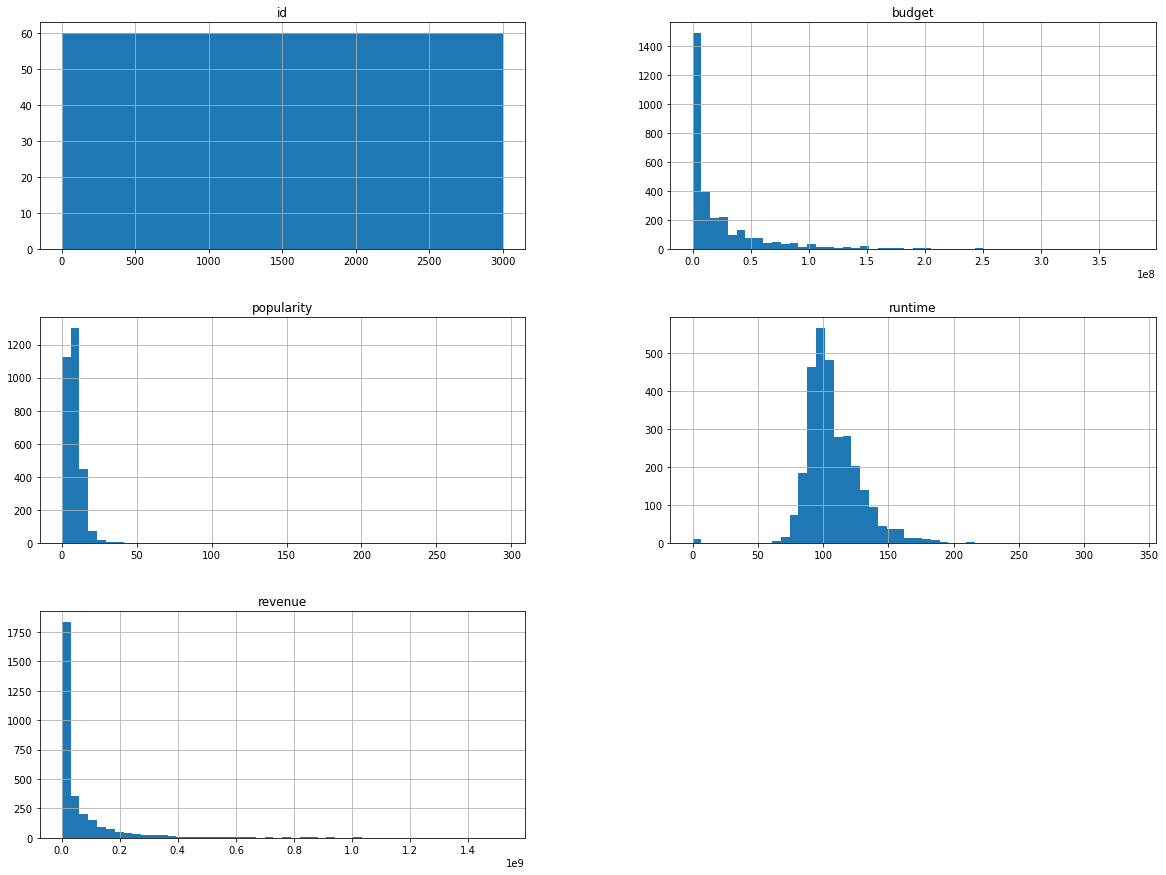

In [13]:
films.hist(bins=50, figsize=(20,15))
plt.show()

The revenue and budget is likely to be correlated, so we will look further at these. Also from the histograms above we notice that th

In [15]:
test.describe()

id        budget   popularity      runtime
count  4398.000000  4.398000e+03  4398.000000  4394.000000
mean   5199.500000  2.264929e+07     8.550230   107.622212
std    1269.737571  3.689991e+07    12.209014    21.058290
min    3001.000000  0.000000e+00     0.000001     0.000000
25%    4100.250000  0.000000e+00     3.895186    94.000000
50%    5199.500000  7.450000e+06     7.482241   104.000000
75%    6298.750000  2.800000e+07    10.938524   118.000000
max    7398.000000  2.600000e+08   547.488298   320.000000